In [2]:
import netCDF4
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
nc_file = '/home/mt/Hanze/Tropomi/tropomi-group-repo-s-group-legend-ab-c-d-k-m-s/data/S5P_OFFL_L2__CH4____20200102T035646_20200102T053816_11503_01_010302_20200103T204214.nc'
# nc_file = '/home/mt/Downloads/S5P_OFFL_L2__CH4____20191201T053833_20191201T072003_11050_01_010302_20191207T082425.nc'

file_ch4 = Dataset(nc_file, mode='r')

In [138]:
# function to filter ch4 where its qa_value is larger than some threashold
def filter_ch4_qa(file, qa_threashold=0.5):
    file_ch4 = Dataset(file, mode='r')
    # get the coordiantes where qa_value is larger than the threashold
    coordinates = []
    qa_value = groups.variables['qa_value'][0]
    lons = file_ch4.groups['PRODUCT'].variables['longitude'][0]
    for x in range(qa_value.shape[0]):
        for y in range(qa_value.shape[1]):
            if qa_value[x][y] >= qa_threashold: # qa_threashold is 0.5 by default
                coordinates.append([x, y])
    
    # initial array
    ch4 = np.zeros(file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0].shape)

    # first make every elements of ch4 nan so that when ploting 
    # pixels where there is low CH4 concentration will not show
    for i in range(file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0].shape[0]):
        for j in range(file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0].shape[1]):
            ch4[i][j] = np.nan

    # itrate every coordinate where qa_value is larger than qa_threashold and update the CH4 value
    for x in range(len(coordinates)):
        ch4[coordinates[x][0]][coordinates[x][1]] = file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0][coordinates[x][0]][coordinates[x][1]]

    return ch4

In [6]:
groups = file_ch4.groups['PRODUCT']
print(groups)

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(3735), ground_pixel(215), corner(4), time(1), layer(12), level(13)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 layer(layer), int32 level(level), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), float32 methane_mixing_ratio(time,scanline,ground_pixel), float32 methane_mixing_ratio_precision(time,scanline,ground_pixel), float32 methane_mixing_ratio_bias_corrected(time,scanline,ground_pixel)
    groups: SUPPORT_DATA


In [62]:
# make a list of coordinates where qa_value is larger than 0.5
coordinates = []
qa_value = groups.variables['qa_value'][0]
lons = file_ch4.groups['PRODUCT'].variables['longitude'][0]
print(type(qa_value))
print(qa_value.shape)
print(lons.shape)
for x in range(qa_value.shape[0]):
    for y in range(qa_value.shape[1]):
        if qa_value[x][y] > 0.5:
            coordinates.append([x, y])

<class 'numpy.ma.core.MaskedArray'>
(3735, 215)
(3735, 215)


In [136]:
# varify that there are some pixels where qa_value is smaller than 0.5
varify_list = []
for x in range(qa_value.shape[0]):
    for y in range(qa_value.shape[1]):
        if qa_value[x][y] < 0.5 and qa_value[x][y]>0:
            varify_list.append([x,y,qa_value[x][y]])
print(len(varify_list))
print(varify_list[0])

36992
[540, 12, 0.39999998]


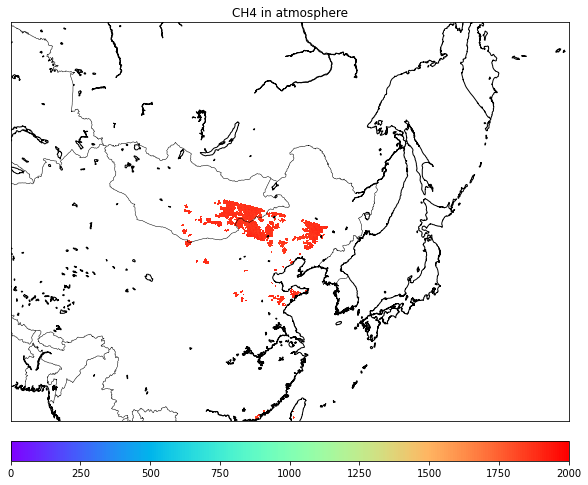

In [143]:
# Plot CH4(with qa_value larger than 0.5) on the map

# get CH4 data by filter_ch4_qa() function:
ch4 = filter_ch4_qa(nc_file, 0.5)
'''# initial some arrays
lons = file_ch4.groups['PRODUCT'].variables['longitude'][0]
lats = file_ch4.groups['PRODUCT'].variables['latitude'][0]
ch4 = np.zeros(file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0].shape)

# first make every elements of ch4 nan so that when ploting 
# pixels where there is low CH4 concentration will not show
for i in range(file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0].shape[0]):
    for j in range(file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0].shape[1]):
        ch4[i][j] = np.nan

# itrate every coordinate where qa_value is larger than 0.5 and update the CH4 value
for x in range(len(coordinates)):
    # print(x, coordinates[x][0], coordinates[x][1])
    lons[coordinates[x][0]][coordinates[x][1]] = file_ch4.groups['PRODUCT'].variables['longitude'][0][coordinates[x][0]][coordinates[x][1]]
    lats[coordinates[x][0]][coordinates[x][1]] = file_ch4.groups['PRODUCT'].variables['latitude'][0][coordinates[x][0]][coordinates[x][1]]
    ch4[coordinates[x][0]][coordinates[x][1]] = file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0][coordinates[x][0]][coordinates[x][1]]
# time_utc = file_ch4.groups['PRODUCT'].variables['time_utc'][0]
print('finished!')'''

plt.figure(figsize=(10, 10))
m = Basemap(width=7000000, height=5000000, resolution='i', projection='stere', lat_0=45, lon_0=120)
xi, yi = m(lons, lats)

# Plot Data
cs = m.pcolor(xi, yi, ch4, cmap='rainbow', vmin=0, vmax=2000)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="5%")


# Add Title
plt.title('CH4 in atmosphere')

plt.show()

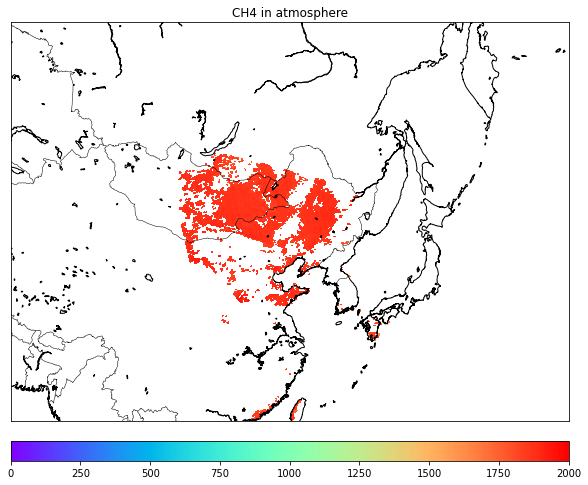

In [146]:
# comparison between plot CH4 without filter out qa_value <= 0.5:
lon = file_ch4.groups['PRODUCT'].variables['longitude'][0]
lat = file_ch4.groups['PRODUCT'].variables['latitude'][0]
CH4_compare = file_ch4.groups['PRODUCT'].variables['methane_mixing_ratio'][0]
# CH4_compare = filter_ch4_qa(nc_file, 0.)

plt.figure(figsize=(10, 10))
m = Basemap(width=7000000, height=5000000, resolution='i', projection='stere', lat_0=45, lon_0=120)

xi, yi = m(lons, lats)

# Plot Data
cs = m.pcolor(xi, yi, CH4_compare, cmap='rainbow', vmin=0, vmax=2000)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="5%")


# Add Title
plt.title('CH4 in atmosphere')

plt.show()

In [147]:
file_ch4.groups['PRODUCT'].variables['qa_value'][0]

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)